In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ini_layers(X,Y):
  n_x = X.shape[0]
  n_y = Y.shape[0]

  return (n_x,n_y)

In [ ]:
def ini_params(n_h, n_x,n_y):
  W1 = np.random.rand(n_h,n_x)
  b1 = np.random.rand(n_h,1)
  W2 = np.random.rand(n_y,n_h)
  b2 = np.random.rand(n_y,1)

  params = {
      "W1": W1,
      "B1": b1,
      "W2": W2,
      "B2": b2
  }

  return params

In [ ]:
def comp_cost(A2,y):
  p1 = np.multiply(y,np.log(A2))
  p2 = np.multiply(1-y,np.log(1-A2))
  m = y.shape[0]
  sum = (-1/m) * np.sum(p1+p2)

  return sum

In [ ]:
def sigmoid(x):
  epsilon = 1e-15
  x = np.clip(x,epsilon, 1-epsilon)
  return 1 / (1+np.exp(-x))

In [ ]:
def forward_prop(X,params):
  W1 = params['W1']
  b1 = params['B1']
  W2 = params['W2']
  b2 = params['B2']

  Z1 = np.dot(W1,X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2) # Changed to sigmoid activation for the output layer

  cache = {
      "Z1": Z1,
      "A1": A1,
      "Z2":Z2,
      "A2":A2
  }

  return (A2,cache)

In [ ]:
def back_prop(X,Y,params,cache):
  Z1 = cache['Z1']
  A1 = cache['A1']
  Z2 = cache['Z2']
  A2 = cache['A2']

  W2 = params['W2']

  m = Y.shape[0]

  dz2 = A2 - Y
  dw2 = (1/m) * np.dot(dz2,A1.T)
  db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
  dz1 = np.dot(W2.T,dz2) * (1-np.power(A1,2))
  dw1 = (1/m) * np.dot(dz1,X.T)
  db1 = (1/m) * np.sum(dz1,axis = 1, keepdims=True)

  grads = {
      "dw2":dw2,
      "db2":db2,
      "dw1":dw1,
      "db1":db1
  }

  return grads

In [ ]:
def update_params(params,grads,l_rate):

    dw1 = grads["dw1"]
    db1 = grads["db1"]
    dw2 = grads["dw2"]
    db2 = grads["db2"]

    W1 = params['W1']
    b1 = params['B1']
    W2 = params['W2']
    b2 = params['B2']

    W1 = W1 - (l_rate * dw1)
    b1 = b1 - (l_rate * db1)
    W2 = W2 - (l_rate * dw2)
    b2 = b2 - (l_rate * db2)

    params = {"W1": W1,
              "B1": b1,
              "W2": W2,
             "B2": b2}

    return params


In [ ]:
def nn_model(X,Y,n_h,n_iter,l_rate):
  (n_x,n_y) = ini_layers(X,Y)
  parameters = ini_params(n_h,n_x,n_y) #parameters should not be params here
  costs = []
  for i in range(n_iter):
    A2,cache = forward_prop(X,parameters)
    cost = comp_cost(A2,Y)
    costs.append(cost)
    grads = back_prop(X,Y,parameters,cache)
    parameters = update_params(parameters,grads,l_rate)

    if i % 100 ==0:
      print(f"THE COST FOR ITERATION {i} is", cost)

  return (parameters,costs,A2)

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X, Y = data.data, data.target

Y = Y.reshape(-1,1)

In [ ]:
print(X.shape,Y.shape)

(150, 4) (150, 1)


In [ ]:
outputs,costs, A2 = nn_model(X,Y,4,1000,4)

THE COST FOR ITERATION 0 is 1.2616826727405215
THE COST FOR ITERATION 100 is 0.42622740746185733
THE COST FOR ITERATION 200 is 0.42622740746185733
THE COST FOR ITERATION 300 is 0.42622740746185733
THE COST FOR ITERATION 400 is 0.42622740746185733
THE COST FOR ITERATION 500 is 0.42622740746185733
THE COST FOR ITERATION 600 is 0.42622740746185733
THE COST FOR ITERATION 700 is 0.42622740746185733
THE COST FOR ITERATION 800 is 0.42622740746185733
THE COST FOR ITERATION 900 is 0.42622740746185733


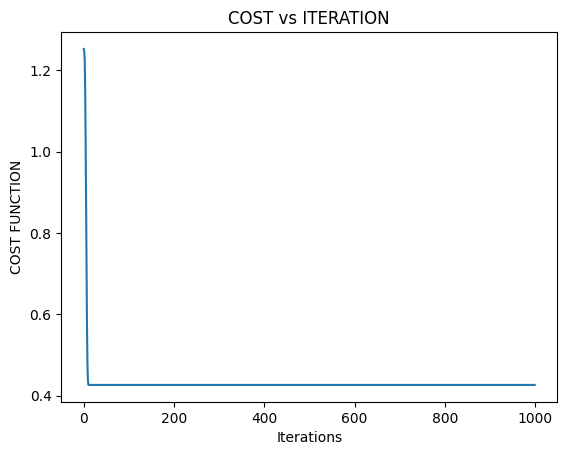

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1000),costs)
plt.xlabel("Iterations")
plt.ylabel("COST FUNCTION")
plt.title("COST vs ITERATION")
plt.show()

#checking accuracy

In [ ]:
A2.shape # the results are the problem of your dataset it's multiclass but your output layer is log reg

(150, 4)